In [1]:
#  Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Load the dataset
df = pd.read_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/vocal_gender_features_new.csv")  # Replace with your actual file name
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print(df.head())

#  Separate features and target label
X = df.drop('label', axis=1)
y = df['label'].astype(int)  # Ensure label is integer

#  Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#  Confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Dataset loaded successfully.
Shape: (15070, 44)
   mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0                1.717415               0.491121                 2.226455   
1                0.281028              -0.075386                 1.349508   
2                0.869924              -0.027844                 1.265341   
3                1.058172               1.025873                 1.250729   
4                0.119538               0.260597                 0.299175   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0               -0.775375                0.657270                1.436276   
1               -0.239354                0.701070               -0.373709   
2                0.435550                0.076009                1.006311   
3               -0.128357               -0.502745                0.589257   
4                0.284340               -0.053971                0.312422   

   mean_spectral_rolloff  

In [3]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Save each split separately
X_train.to_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/X_train.csv", index=False)
X_test.to_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/X_test.csv", index=False)
y_train.to_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/y_train.csv", index=False)
y_test.to_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/y_test.csv", index=False)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Define models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\n🧠 Training: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))



🧠 Training: K-Nearest Neighbors
✅ Accuracy: 0.9987
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1046
           1       1.00      1.00      1.00      1968

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014


🧠 Training: Random Forest
✅ Accuracy: 0.9937
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1046
           1       0.99      1.00      1.00      1968

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014


🧠 Training: SVM (RBF Kernel)
✅ Accuracy: 0.9993
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1046
           1   

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create leaderboard list
leaderboard = []

# Re-train models and populate leaderboard
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    leaderboard.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    })

# Create DataFrame
leaderboard_df = pd.DataFrame(leaderboard)

# Sort by Accuracy
leaderboard_df = leaderboard_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display leaderboard
print("\n🏆 Model Leaderboard:")
print(leaderboard_df)



Training: K-Nearest Neighbors

Training: Random Forest

Training: SVM (RBF Kernel)

Training: Gradient Boosting

Training: Neural Network (MLP)

🏆 Model Leaderboard:
                  Model  Accuracy  Precision  Recall  F1 Score
0      SVM (RBF Kernel)    0.9993     0.9990  1.0000    0.9995
1   K-Nearest Neighbors    0.9987     0.9985  0.9995    0.9990
2  Neural Network (MLP)    0.9987     0.9995  0.9985    0.9990
3     Gradient Boosting    0.9947     0.9939  0.9980    0.9959
4         Random Forest    0.9937     0.9919  0.9985    0.9952


In [29]:
import pickle
import os

# Create a directory to save models
os.makedirs("saved_models", exist_ok=True)

# Save each model as a pickle file
for name, model in models.items():
    filename = f"saved_models/{name.replace(' ', '_').replace('(', '').replace(')', '')}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
        print(f"✅ Saved: {filename}")


✅ Saved: saved_models/K-Nearest_Neighbors.pkl
✅ Saved: saved_models/Random_Forest.pkl
✅ Saved: saved_models/SVM_RBF_Kernel.pkl
✅ Saved: saved_models/Gradient_Boosting.pkl
✅ Saved: saved_models/Neural_Network_MLP.pkl


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score



In [13]:
#  Load the dataset
df = pd.read_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/vocal_gender_features_new.csv")  # Ensure this is the original dataset without labels used for clustering

#  Drop the label for unsupervised clustering
X = df.drop('label', axis=1)

#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


KMeans Silhouette Score: 0.1745264670426607


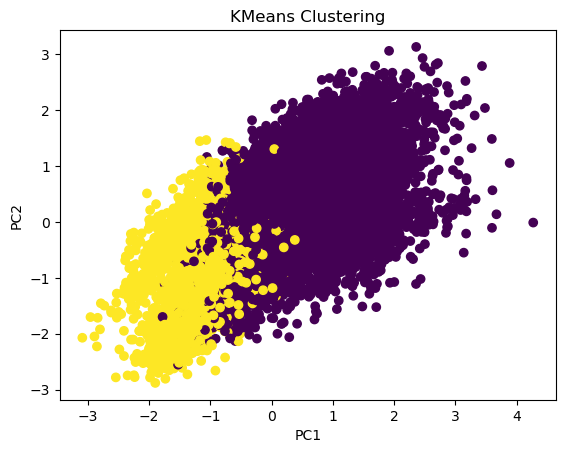

In [15]:
#  Apply K-Means with 2 clusters (male, female)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_score)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


DBSCAN found less than 2 clusters. Silhouette Score not applicable.


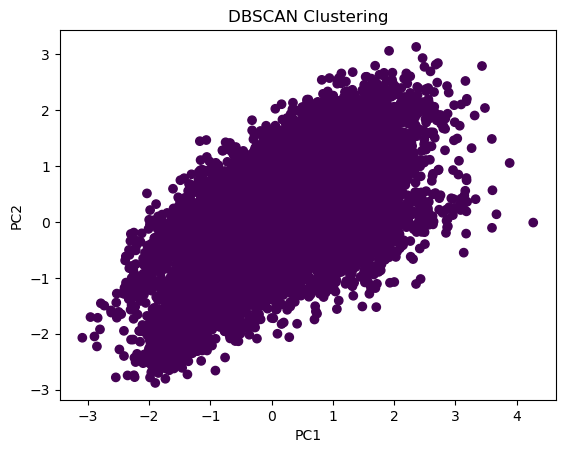

In [17]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filter noise (-1)
mask = dbscan_labels != -1
if sum(mask) > 1:
    dbscan_score = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_score)
else:
    print("DBSCAN found less than 2 clusters. Silhouette Score not applicable.")

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Agglomerative Clustering Silhouette Score: 0.1686319416457153


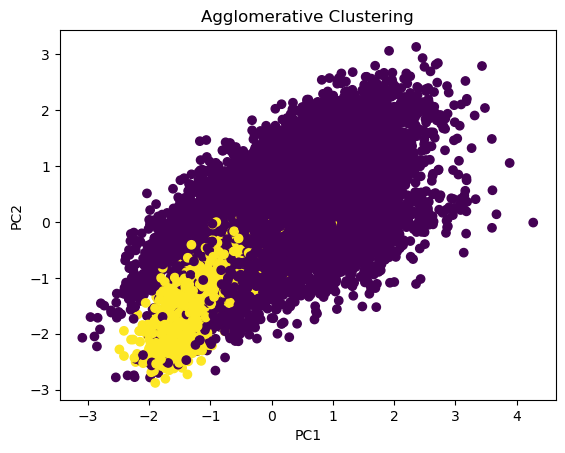

In [19]:
# Apply Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)
print("Agglomerative Clustering Silhouette Score:", agg_score)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


GMM Silhouette Score: 0.15896256510882142


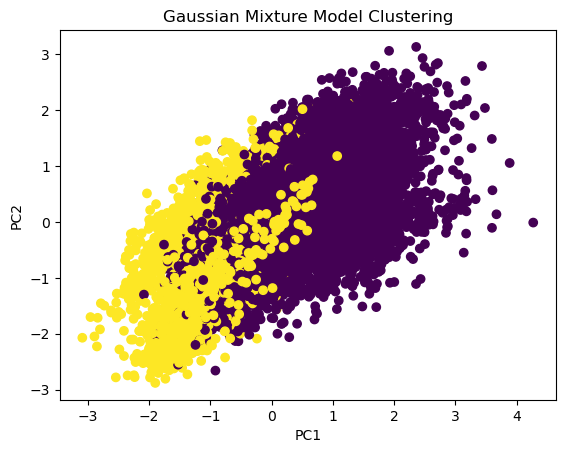

In [21]:
# Apply GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_score = silhouette_score(X_scaled, gmm_labels)
print("GMM Silhouette Score:", gmm_score)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [27]:
model_scores = {
    "KMeans": silhouette_score(X_scaled, kmeans_labels),
    "DBSCAN": silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if np.sum(dbscan_labels != -1) > 1 else -1,
    "Agglomerative": silhouette_score(X_scaled, agg_labels),
    "GMM": silhouette_score(X_scaled, gmm_labels),
}


In [29]:
import pandas as pd

score_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Silhouette Score"])
score_df_sorted = score_df.sort_values(by="Silhouette Score", ascending=False)
print(score_df_sorted)


           Model  Silhouette Score
0         KMeans          0.174526
2  Agglomerative          0.168632
3            GMM          0.158963
1         DBSCAN         -1.000000


In [31]:
best_model_name = score_df_sorted.iloc[0]["Model"]
best_score = score_df_sorted.iloc[0]["Silhouette Score"]

print(f"✅ Best Clustering Model: {best_model_name} (Silhouette Score: {best_score:.4f})")


✅ Best Clustering Model: KMeans (Silhouette Score: 0.1745)


In [23]:
import os

# Create the directory only if it doesn't exist
os.makedirs("saved_culstering_models", exist_ok=True)


In [25]:
import pickle

# Save KMeans
with open("saved_culstering_models/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Save DBSCAN
with open("saved_culstering_models/dbscan_model.pkl", "wb") as f:
    pickle.dump(dbscan, f)

# Save Agglomerative
with open("saved_culstering_models/agg_model.pkl", "wb") as f:
    pickle.dump(agg, f)

# Save GMM
with open("saved_culstering_models/gmm_model.pkl", "wb") as f:
    pickle.dump(gmm, f)


In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/vocal_gender_features_new.csv")

# Separate features and target
X = df.drop('label', axis=1)
y = df['label'].astype(int)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Select top 10 features
top_10 = importances.sort_values(ascending=False).head(10).index.tolist()

print("Top 10 Selected Features:")
print(top_10)


Top 10 Selected Features:
['mfcc_5_mean', 'mfcc_3_std', 'mean_spectral_contrast', 'mfcc_2_mean', 'std_spectral_bandwidth', 'mfcc_12_mean', 'mfcc_1_mean', 'rms_energy', 'mfcc_10_mean', 'mfcc_2_std']


In [31]:
from sklearn.preprocessing import StandardScaler
import pickle

# Suppose you already have top_10 and df loaded
X_top10 = df[top_10]

# Step 1: Fit the scaler
scaler = StandardScaler()
scaler.fit(X_top10)

# Step 2: Save the fitted scaler
with open("C:/Users/hp/saved_models/scaler_top10.pkl", "wb") as f:
    pickle.dump(scaler, f)



In [37]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pickle

# Load dataset
df = pd.read_csv("D:/Project/Guvi_Project/Human Voice Classification and Clustering/dataset/vocal_gender_features_new.csv")  # Use correct path

# Define top 10 features
top_10 = [
    'mfcc_1_mean', 'mean_pitch', 'mfcc_3_mean', 'mfcc_5_mean', 
    'zero_crossing_rate', 'rms_energy', 'mean_spectral_centroid',
    'std_pitch', 'mfcc_2_mean', 'log_energy'
]

X = df[top_10]
y = df['label'].astype(int)

# Fit scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_scaled, y)

# Save model and scaler
with open("C:/Users/hp/saved_models/SVM_top10.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("C:/Users/hp/saved_models/scaler_top10.pkl", "wb") as f:
    pickle.dump(scaler, f)

